In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
corndata =  pd.read_excel(r"C:\web\data\corn\data_use\excel\20190106\data_merged_20190106.xlsx",index_col='ID_Number')
corndata.tail()

,Unnamed: 0,msp_green,msp_nir,msp_red,msp_red_edge,red_rgb,green_rgb,blue_rgb,yield/hec,total_days_image_1
ID_Number,,,,,,,,,,
10154,40,0.105153,0.347812,0.109033,0.242460,141.022333,141.321340,96.574916,2.587600,25
10155,41,0.088584,0.322279,0.067498,0.204982,76.935682,82.826750,51.728836,1.615625,30
10156,42,0.079569,0.316047,0.054874,0.183994,95.197232,102.546878,64.915312,1.902500,49
10158,43,0.105279,0.287510,0.092867,0.201644,117.988129,115.716134,75.143440,2.075500,26
10159,44,0.075264,0.328110,0.056685,0.199832,98.715930,108.968950,70.892782,2.617582,46


1 hectare = 6.25 rai  
yield มีหน่วย [ton]
หน่วย ของ data นี้ต้องเป็น ton/rai แปลงเป็น kg/hec คูณด้วย 6250 

In [3]:

corndata_col = corndata.columns
predictors = corndata[corndata_col[corndata_col != 'yield/hec']] # all columns except 'yield/hec'
target = corndata['yield/hec'] # 'yield/hec' column
pre_col = predictors.columns
predictors = predictors[pre_col[pre_col != 'Unnamed: 0']]
predictors

,msp_green,msp_nir,msp_red,msp_red_edge,red_rgb,green_rgb,blue_rgb,total_days_image_1
ID_Number,,,,,,,,
10002,0.080167,0.418589,0.048759,0.238460,63.551231,76.317227,51.391189,55
10007,0.075473,0.312743,0.045905,0.183603,73.699548,87.756777,61.849493,49
10008,0.077287,0.272558,0.049910,0.176620,66.416702,74.681815,50.860358,47
10011,0.078634,0.194409,0.059066,0.138047,93.151578,93.485547,70.620608,58
10013,0.086973,0.305774,0.052698,0.207135,69.452698,79.538782,60.151405,58
10015,0.082368,0.267920,0.065824,0.168026,59.631320,63.255076,46.565749,54
10023,0.078064,0.491790,0.041004,0.258291,52.621608,70.407779,50.190558,59
10028,0.082890,0.419538,0.060208,0.276170,51.568836,58.861715,43.606378,59
10029,0.077292,0.380400,0.048063,0.239020,42.283816,49.809906,30.307848,52


In [4]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()
n_cols = predictors_norm.shape[1] # number of predictors
print(n_cols)
predictors_norm.head()

8


,msp_green,msp_nir,msp_red,msp_red_edge,red_rgb,green_rgb,blue_rgb,total_days_image_1
ID_Number,,,,,,,,
10002,-0.679758,1.536510,-0.980096,0.952885,-0.639088,-0.339128,-0.399714,0.993469
10007,-1.062235,-0.070645,-1.101692,-0.587020,-0.252191,0.175545,0.217681,0.453757
10008,-0.914388,-0.680803,-0.931055,-0.783050,-0.529844,-0.412706,-0.431051,0.273854
10011,-0.804688,-1.867398,-0.540950,-1.865829,0.489405,0.433286,0.735475,1.263324
10013,-0.125270,-0.176451,-0.812293,0.073561,-0.414099,-0.194188,0.117436,1.263324


In [5]:
x_train, x_test, y_train, y_test = train_test_split(predictors_norm,target, test_size=0.2, random_state=42)

In [35]:

# create model
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# model.add(Dense(64, activation='relu', input_shape=(n_cols,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(1))

# compile model
model.compile(optimizer='adam', loss="mean_absolute_error")


loss มีอะไรบ้างดูได้ที่ https://keras.io/api/losses/

In [29]:
x_test = np.array(x_test)
x_train = np.array(x_train)
predictors_norm = np.array(predictors_norm)

In [36]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=100, verbose=0)
model.evaluate(x_test,y_test,batch_size =1)

9/9 [==============================] - 0s 2ms/step - loss: 0.3930


0.39302024245262146

In [37]:
# จะดูค่า mean abs percentage error ว่าเป็นเท่าไร

y_pred = model.predict(
    predictors_norm,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(target, y_pred).numpy()


2/2 [==============================] - 0s 3ms/step


32.5039

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.197630,0.620340,95
96,0.194720,0.621892,96
97,0.191496,0.625020,97
98,0.187772,0.629355,98
99,0.183982,0.631932,99


In [39]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

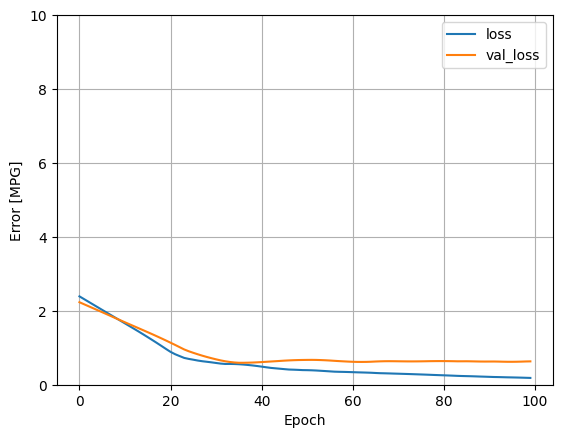

In [40]:
plot_loss(history)